In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [3]:
df_ucl = pd.read_csv('results_ucl_tig.csv')
df_albu2d_pretrain = pd.read_csv('2d-pretrain.csv')
df_albu2d_nopretrain = pd.read_csv('2d-no-pretrain.csv')
df_albu3d_pretrain = pd.read_csv('3d-pretrain.csv')
df_albu3d_nopretrain = pd.read_csv('3d-no-pretrain.csv')
ucl_tc_dice = df_ucl['Dice_TC'].iloc[0:66].values
albu2d_pretrain = df_albu2d_pretrain['Dice_TC'].iloc[0:66].values
albu2d_nopretrain = df_albu2d_nopretrain['Dice_TC'].iloc[0:66].values
albu3d_pretrain = df_albu3d_pretrain['Dice_TC'].iloc[0:66].values
albu3d_nopretrain = df_albu3d_nopretrain['Dice_TC'].iloc[0:66].values

In [4]:
dices_data = np.vstack([ucl_tc_dice, albu3d_pretrain, albu3d_nopretrain, albu2d_pretrain, albu2d_nopretrain]).T

In [5]:
df_dices = pd.DataFrame(data=dices_data, columns=['UCL-TIG (baseline)', 'AlbuNet3D (pretr.)', 'AlbuNet3D (no pretr.)', 'AlbuNet2D (pretr.)', 'AlbuNet2D (no pretr.)'])

In [6]:
df_dices.head()

,UCL-TIG (baseline),AlbuNet3D (pretr.),AlbuNet3D (no pretr.),AlbuNet2D (pretr.),AlbuNet2D (no pretr.)
0,0.94066,0.93747,0.92770,0.92105,0.93299
1,0.95684,0.94147,0.95118,0.95390,0.94478
2,0.93997,0.93049,0.93531,0.93727,0.92257
3,0.93035,0.94043,0.93331,0.93619,0.93133
4,0.89697,0.87612,0.52061,0.27447,0.37945


In [20]:
np.mean(ucl_tc_dice)

0.8541972727272727

In [21]:
np.std(ucl_tc_dice)

0.13911081585017526

In [22]:
np.mean(albu_pretrain)

0.7968918181818182

In [23]:
np.std(albu_pretrain)

0.2360952614037399

In [24]:
np.mean(albu_nopretrain)

0.7775474242424242

In [25]:
np.std(albu_nopretrain)

0.2349440409732071

In [26]:
np.random.seed(66)
x = np.random.normal(loc=0, scale=0.2, size=66)
y = np.random.normal(loc=0.07, scale=0.2, size=66)

In [19]:
from scipy.stats import ttest_ind

# calculate the significance
value, pvalue = ttest_ind(x, y, equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-2.1058174564248917 0.037143505619409004
Samples are likely drawn from different distributions (reject H0)


In [49]:
rcParams.keys()

NameError: name 'rcParams' is not defined

In [7]:
import matplotlib.pyplot as plt

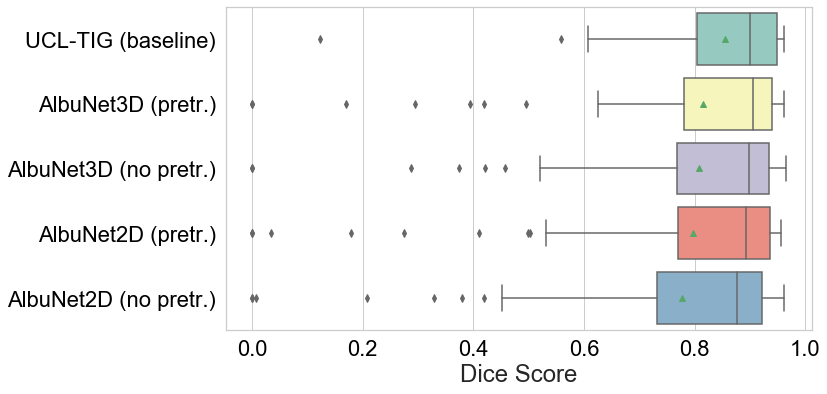

In [9]:
# sns.set_context("talk")
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("whitegrid", {"text.color": "0", "xtick.color": "0", "ytick.color": "0"})
sns.set_context("notebook", font_scale=2)
# sns.despine()
#my_pal = {"UCL-TIG": "b", "AlbuNet2D (pretr.)": "r", "AlbuNet2D (no pretr.)":"y"}
# palette=my_pal,
ax = sns.boxplot(data=df_dices, palette=sns.color_palette("Set3"), orient="h", width=0.8, showmeans=True).set_xlabel('Dice Score')
# .set_title('BraTS \'18 Tumor Core Dice Scores')

plt.tight_layout()
plt.savefig("dice_boxplot.pdf")
plt.show()

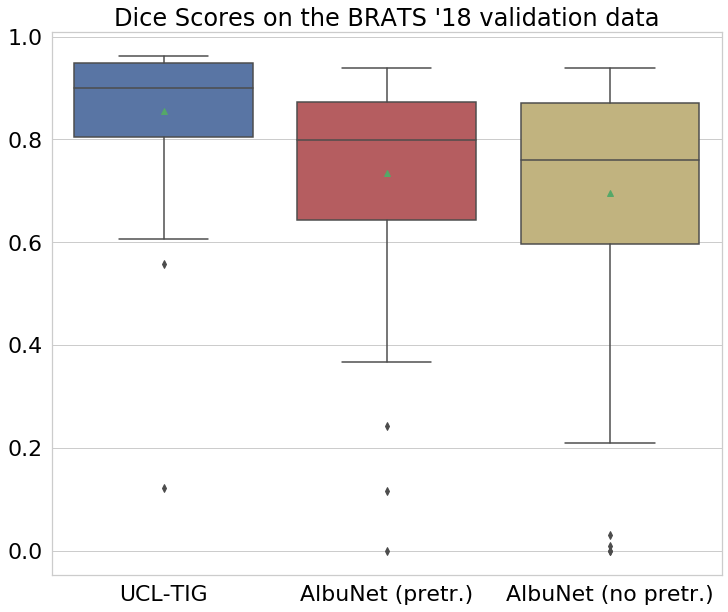

In [15]:
# sns.set_context("talk")
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("whitegrid", {"text.color": "0", "xtick.color": "0", "ytick.color": "0"})
sns.set_context("notebook", font_scale=2)
# sns.despine()
my_pal = {"UCL-TIG": "b", "AlbuNet (pretr.)": "r", "AlbuNet (no pretr.)":"y"}
ax = sns.boxplot(data=df_dices, orient="v", palette=my_pal, width=0.8, showmeans=True).set_title('Dice Scores on the BRATS \'18 validation data')